# Exploratory Data Analysis (EDA)

### Introducción

Este notebook se enfoca en el análisis exploratorio de un dataset de juegos de Steam, con el fin de identificar los datos clave para el funcionamiento de una API.

### Objetivos

- Analizar la estructura y tendencias del dataset.
- Seleccionar atributos relevantes para la API.

In [66]:
# Importación de librerías
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud

In [9]:
# Deshabilitamos el limite máximo de columnas mostradas en el notebook
pd.set_option('display.max_columns', None)

### Carga de datos procesados en ETL.ipynb

In [40]:
nombre_dir = 'data_pickle'

# Datasets de steam_games a pickle
df_steamgames: pd.DataFrame = pd.read_pickle(f'./{nombre_dir}/df_steamgames_clean.pkl')
df_steamgames_genres: pd.DataFrame = pd.read_pickle(f'./{nombre_dir}/df_steamgames_genres.pkl')
df_steamgames_tags: pd.DataFrame = pd.read_pickle(f'./{nombre_dir}/df_steamgames_tags.pkl')
df_steamgames_specs: pd.DataFrame = pd.read_pickle(f'./{nombre_dir}/df_steamgames_specs.pkl')

# Dataset de user_reviews a pickle
df_userreviews: pd.DataFrame = pd.read_pickle(f'./{nombre_dir}/df_userreviews_clean.pkl')

# Dataset de users_items a pickle
df_usersitems: pd.DataFrame = pd.read_pickle(f'./{nombre_dir}/df_usersitems_clean.pkl')

## Datos de 'steam_games'

In [35]:
df_steamgames.head()

,publisher,app_name,title,url,reviews_url,price,early_access,id,developer,release_year
88310,Kotoshiro,Lost Summoner Kitty,Lost Summoner Kitty,http://store.steampowered.com/app/761140/Lost_...,http://steamcommunity.com/app/761140/reviews/?...,4.99,False,761140,Kotoshiro,2018-01-01
88311,"Making Fun, Inc.",Ironbound,Ironbound,http://store.steampowered.com/app/643980/Ironb...,http://steamcommunity.com/app/643980/reviews/?...,Free To Play,False,643980,Secret Level SRL,2018-01-01
88312,Poolians.com,Real Pool 3D - Poolians,Real Pool 3D - Poolians,http://store.steampowered.com/app/670290/Real_...,http://steamcommunity.com/app/670290/reviews/?...,Free to Play,False,670290,Poolians.com,2017-01-01
88313,彼岸领域,弹炸人2222,弹炸人2222,http://store.steampowered.com/app/767400/2222/,http://steamcommunity.com/app/767400/reviews/?...,0.99,False,767400,彼岸领域,2017-01-01
88315,Trickjump Games Ltd,Battle Royale Trainer,Battle Royale Trainer,http://store.steampowered.com/app/772540/Battl...,http://steamcommunity.com/app/772540/reviews/?...,3.99,False,772540,Trickjump Games Ltd,2018-01-01


### Géneros, Tags y Specs
Los géneros, tags y specs son atributos categóricos. Son posibles features para nuestro sistema de recomendación.

#### Nubes de palabras
Utilicemos nubes de palabras para visualizar las frecuencias de ocurrencias de estas categorías.

In [42]:
# Creamos una función que produce wordclouds
def reproducir_wordcloud(df: pd.DataFrame):
    """Reproduce un plot tipo worldcloud dado un dataframe con columnas categóricas y valores booleanos.
    """
    # Convertir los valores booleanos a enteros
    df_int = df.astype(int)
    # Crear un diccionario con el conteo de géneros
    genre_counts = df_int.sum(axis=0).to_dict()
    # Crear un objeto WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white')
    # Generar la nube de palabras usando el conteo de géneros
    wordcloud.generate_from_frequencies(genre_counts)

    # Mostrar la nube de palabras usando matplotlib
    plt.figure(figsize=(12, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    return plt

##### Nube de palabras: Géneros

<module 'matplotlib.pyplot' from '/home/seb/Projects/PI1_MLOps_Steam/.venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

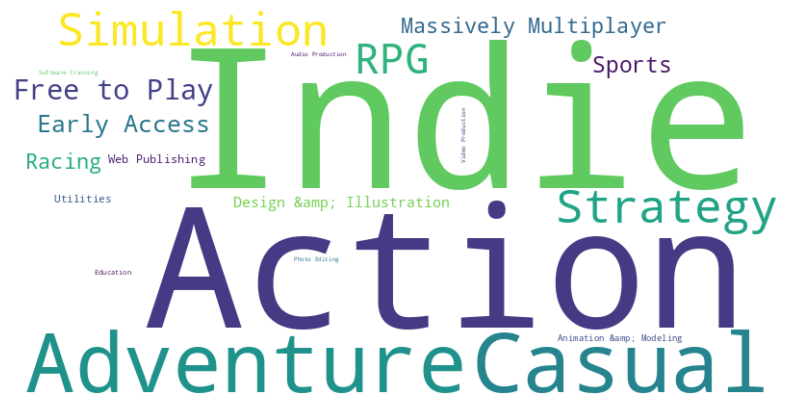

In [43]:
reproducir_wordcloud(df_steamgames_genres)

- Indie, Action, Adventure y Casual son los géneros mas comunes.

In [68]:
# 'df_steamgames_genres' contiene géneros que no aplican a juegos (ej. "Photo Editing"). Estas columnas serán eliminadas.
# Descartamos las columns de 'df_steamgames_genres' los géneros que no aplican a juegos 
df_steamgames_genres.drop(['Utilities', 'Software Training', 'Photo Editing', 'Web Publishing', 'Design &amp; Illustration',
                           'Animation &amp; Modeling', 'Audio Production', 'Video Production'
                           ],
                           axis=1, inplace=True
)

##### Nube de palabras: Tags

<module 'matplotlib.pyplot' from '/home/seb/Projects/PI1_MLOps_Steam/.venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

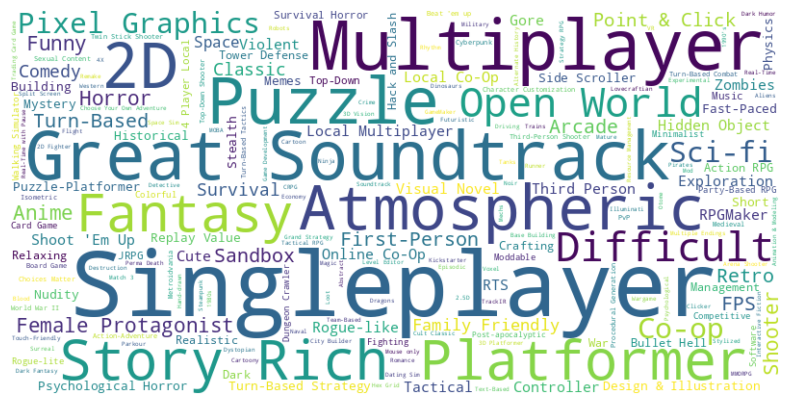

In [44]:
reproducir_wordcloud(df_steamgames_tags)

##### Nube de palabras: Specs

<module 'matplotlib.pyplot' from '/home/seb/Projects/PI1_MLOps_Steam/.venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

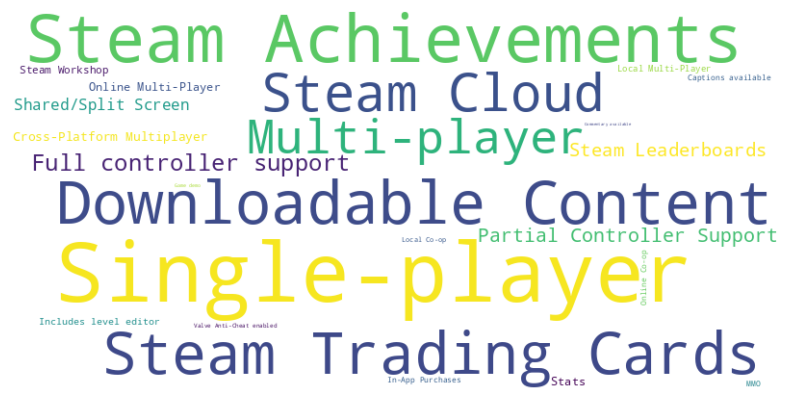

In [45]:
reproducir_wordcloud(df_steamgames_specs)

#### Correlaciones entre Géneros, Tags y Specs

In [76]:
# Matriz de correlación de Géneros contra Tags y Specs
# Aseguramos que ambos dataframes estén alineados por los índices y los valores sean tipo int
df_genre = df_steamgames_genres.sort_index().astype(int)
df_tags = df_steamgames_tags.sort_index().astype(int)
df_specs = df_steamgames_specs.sort_index().astype(int)

# Unimos los dataframes 
df_genre_tags = pd.concat([df_genre, df_tags], axis=1)
df_genre_spec = pd.concat([df_genre, df_specs], axis=1)

# Creamos la matriz de correlación
matiz_corr_genre_tags = df_genre_tags.corr()
matiz_corr_genre_spec = df_genre_spec.corr()

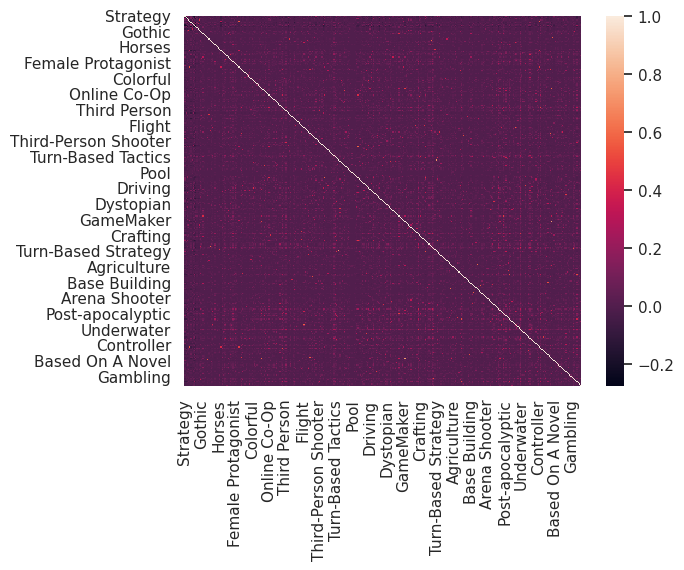

In [77]:
# Correlación Géneros y Tags
sns.heatmap(matiz_corr_genre_tags)
plt.show()

* Existen tantos Tags que es difícil visualmente distinguir las correlaciones.

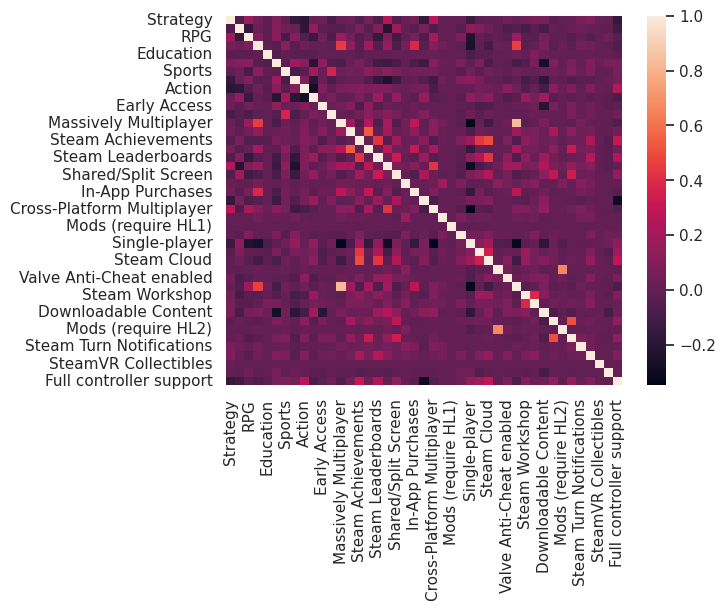

In [78]:
# Correlación Géneros y Specs
sns.heatmap(matiz_corr_genre_spec)
plt.show()

### Análisis de Precios

In [46]:
# Notamos que existen valores tipo string en 'price'
# Filtramos los strings en esta columna para visualizarlos
strings_en_col_price = df_steamgames['price'].apply(lambda x: isinstance(x, str))
df_steamgames[strings_en_col_price]['price'].value_counts()

price
Free                             668
Free to Play                     469
Free To Play                     367
Free Mod                           4
Free Demo                          3
Play for Free!                     2
Third-party                        2
Play Now                           2
Install Now                        1
Play WARMACHINE: Tactics Demo      1
Install Theme                      1
Free HITMAN™ Holiday Pack          1
Play the Demo                      1
Name: count, dtype: int64

In [47]:
# En la column 'price' existen strings que no podemos evaluar como valores numéricos
# Creamos una función que convierte los strings que sugieren ser gratuitos (contienen las palabra 'free') a valor 0.0
def convertir_gratis_a_cero(valor_en_columna):
    # Guard-clause que revisa si valor_en_columna es de tipo str
    if not isinstance(valor_en_columna, str):
        return valor_en_columna
    # Separamos valor_en_columna en una lista para poder evaluar su contenido
    valor_a_lista = valor_en_columna.lower().split()
    # Condicional que retorna True si valor_a_lista contiene las palabra 'free'
    es_gratuito = 'free' in valor_a_lista
    return 0.0 if es_gratuito else None

In [48]:
# Aplicamos 'convertir_gratis_a_cero' a columna 'price'
df_steamgames['price'] = df_steamgames['price'].apply(convertir_gratis_a_cero)
# Descartamos los valores nulos porque no podemos deducir su precio.
df_steamgames.dropna(subset=['price'], inplace=True)

In [49]:
# Distribución de precios
df_steamgames['price'].describe()

count    27313.000000
mean         8.685173
std         14.644546
min          0.000000
25%          2.990000
50%          4.990000
75%          9.990000
max        995.000000
Name: price, dtype: float64

Text(0, 0.5, 'Cantidad de Juegos')

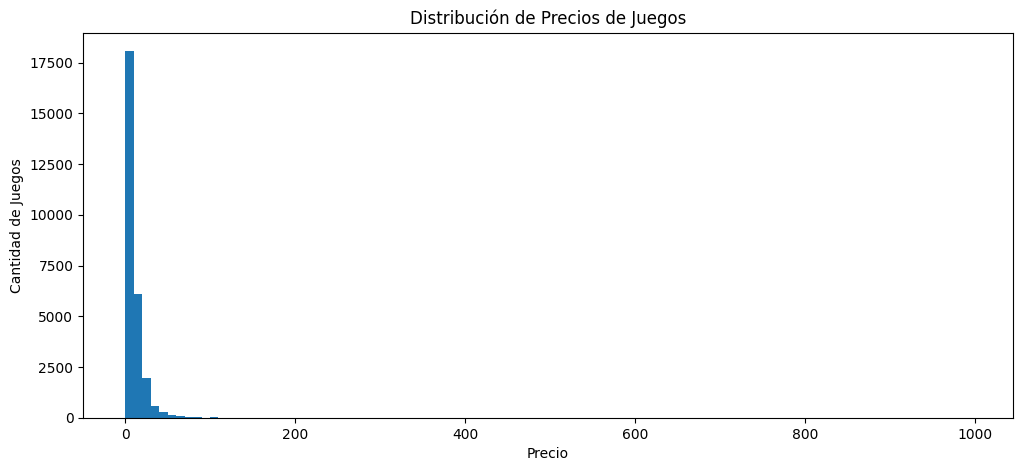

In [51]:
# Visualizamos la distribución de precios de juegos
plt.figure(figsize=(12, 5))
df_steamgames['price'].plot(kind='hist', bins=100, title='Distribución de Precios de Juegos')
plt.xlabel('Precio')
plt.ylabel('Cantidad de Juegos')

* La mayoría de precios son de $9.99 o menos. Existen outliers y valores faltantes, pero los datos de precio caen fuera del enfoque del API, asi los dejamos tal como están.